In [ ]:
from data import BaostockDataWorker, DATABASE
DATABASE_PATH = os.getcwd()     # 解决方法
print("----database:"+DATABASE_PATH +"/"+ DATABASE + "----")
dw = BaostockDataWorker()


In [ ]:
# t = dw.all_tickers[dw.all_tickers.type == 1 & dw.all_tickers.status == 1].sample(1).iloc[0].code
t = dw.all_tickers
t[t.type == "1"]

In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取行业分类数据
rs = bs.query_stock_industry()
# rs = bs.query_stock_basic(code_name="浦发银行")
print('query_stock_industry error_code:'+rs.error_code)
print('query_stock_industry respond  error_msg:'+rs.error_msg)

# 打印结果集
industry_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    industry_list.append(rs.get_row_data())
result = pd.DataFrame(industry_list, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:/stock_industry.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

In [ ]:
result

In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000032",
    "date,code,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

df = rs.get_data()

#### 登出系统 ####
bs.logout()
df

In [ ]:
df[['open',	'high',	'low',	'close','volume','amount']] = df[['open',	'high',	'low',	'close','volume','amount']].astype("float64")
df.info()

In [1]:
from datetime import datetime
import pandas as pd
today = datetime.today().strftime("%Y-%m-%d-%H")   # make sure it does not go beyond to the next day
df = pd.read_excel("000016(full).xls", dtype={'code':'str'}, header = 0)
df = df.sample(2) # 测试时用
r = df[0]
print(f"{r.code} {r.name}")
# for i, row in df.iterrows(): # for each SZ50 constituent
#     print(row)
#     print(f"#{i} processing stock {row.code} {row.name}")
#     result = run(row, days= 2500)   # 改成1500时,IndexError("single positional indexer is out-of-bounds")
#     result.to_csv(f"experiments/{today}{row.code}.csv")


KeyError: 0

In [ ]:
# sdf.resample('D', on = sdf.index)
sdf = sdf.reset_index() 
sdf

In [ ]:
sdf['date'] = sdf.date.apply(pd.to_datetime)
sdf

In [ ]:
df.iloc[-1,['close']].to_dict() 

In [ ]:
sdf.resample("D", on= "date").mean()


In [ ]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d.%W.")

In [ ]:
rs_ = rs[OLHCVA].pct_change().dropna()

In [ ]:
rs_.describe()

In [ ]:
rs_[['volume','amount']] = rs_[['volume','amount']].applymap(sigmoid_)

In [ ]:
sns.pairplot(rs_)

In [ ]:
import seaborn as sns
sns.factorplot(rs_.sample(100))

In [ ]:
dots = sns.load_dataset("dots")
sns.kdeplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

dots

In [ ]:
from unicodedata import category
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
sns.pairplot(data=penguins, hue="species")

In [ ]:
pt = PowerTransformer(method='box-cox', standardize=False)
X_pt = pt.fit_transform(X)                   
sns.displot(X_pt, kde=True)

In [ ]:
df = pd.DataFrame({'A':np.array([1,np.nan,2,3,6,np.nan]),
                 'B':np.array([np.nan,4,np.nan,5,9,np.nan]),
                  'C':'foo'})
df.isna()                  

In [ ]:
x = np.array([0,1,3])
y = np.array([0,1,5])
a1=len(x)*((x*y).sum())-x.sum()*y.sum()
a2=len(x)*((x**2).sum())-(x.sum())**2
a=a1/a2
b=y.mean()-a*(x.mean())
print(a,b)

In [ ]:
# 第二种解法： a = np.cov(x,y)/ x.var(), b = (y - a*x).mean() 
a = ((x*y).mean() - x.mean()*y.mean())/x.var()
b = (y - a*x).mean() 
print(a,b)


covar = lambda x,y: ((x*y).mean() - x.mean()*y.mean())

covar(x,y)/covar(x,x)

In [ ]:
# 用np.cov(), np.var() 要注意是总体还是样本，总体的时候分母是n，样本时分母是n-1
np.cov(x,y)[1,0]*2/3 , covar(x,y)
covar(x,x) , x.var()


In [ ]:
#首先我们先建立一个数据集，这也是之后用来训练和测试的数据
#导入包，创建数据集
import pandas as pd
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
exam=pd.DataFrame(examDict)
#看看数据集长什么样
exam.head()

In [ ]:
import numpy as np

### EM算法过程函数定义
def em(data, thetas, max_iter=30, eps=1e-3):
    '''
    输入：
    data：观测数据
    thetas：初始化的估计参数值
    max_iter：最大迭代次数
    eps：收敛阈值
    输出：
    thetas：估计参数
    '''
    # 初始化似然函数值
    ll_old = -np.infty
    for i in range(max_iter):
        ### E步：求隐变量分布
        # 对数似然 [coin_num, exp_num], [2, 5]
        log_like = np.array([np.sum(data * np.log(theta), axis=1) for theta in thetas])
        # 似然 [coin_num, exp_num], [2, 5]
        like = np.exp(log_like)
        # 求隐变量分布 [coin_num, exp_num], [2, 5]  Q_i
        ws = like/like.sum(0)
        # 概率加权 [2, 5, 2]
        vs = np.array([w[:, None] * data for w in ws])
        ### M步：更新参数值 [2, 2]  [[A_+,A_-],[B_+,B_-]]
        thetas = np.array([v.sum(0)/v.sum() for v in vs])
        # 更新似然函数
        ll_new = np.sum([w*l for w, l in zip(ws, log_like)])  # 计算似然函数 \hat(theta):=\arg,\max_{\theta}\sum_{i=1}^m\sum_{z^{(i)}Q_i(z^{(i)})\log{P(x_i,z^{(i)}|\theta)}}
        print("Iteration: %d" % (i+1))
        print("theta_B = %.2f, theta_C = %.2f, ll = %.2f"
              % (thetas[0,0], thetas[1, 0], ll_new))
        # 满足迭代条件即退出迭代
        if np.abs(ll_new - ll_old) < eps:
            break
        ll_old = ll_new
    return thetas


if __name__ == "__main__":
    # 观测数据，5次独立试验，每次试验10次抛掷的正反次数
    # 比如第一次试验为5次正面5次反面
    observed_data = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
    # 初始化参数值，即硬币B的正面概率为0.6，硬币C的正面概率为0.5
    thetas = np.array([[0.6, 0.4], [0.5, 0.5]])
    # thetas = em(observed_data, thetas, max_iter=30, eps=1e-3)
    thetas = em(observed_data, thetas) #, max_iter=30, eps=1e-4)
    print(thetas)


In [ ]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,time,code,name,open,high,low,close,volume,amount,adjustflag",
    start_date='2017-07-01', end_date='2017-07-31',
    frequency="5", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
# result.to_csv("D:\\history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

In [ ]:
import pandas as pd
df = pd.read_excel("000016closeweight.xls",header = 0)
df

In [ ]:
df.iloc[0]

In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:/sz50_stocks.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

In [ ]:
result

In [ ]:
import numpy as np
x = np.linspace(0,10,100)
y = np.sin(x)
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc("font",family='Heiti TC')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(x,y)
plt.hlines(0,0,10)
plt.text(0,0.5,"上缩")
plt.text(2,0.5,"下放")
plt.text(3,-0.5,"下缩")
plt.text(5,-0.5,"上放")
plt.text(6,0.5,"上缩")
plt.text(8,0.5,"下放")

In [ ]:
def market_of(ticker:str) -> str:
        '''根据股票代码，返回其所在的大盘指数代码
        http://baostock.com/baostock/index.php/指数数据
        综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
        规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
        注意指数没有分钟线数据... ...怎么办？
        ie. 'sh.000023' goes to 'sh.000001' # 上证综指 
            'sz.300333' goes to 'sz.399106' # 深圳综指
            'hk.00700' goes to 'HSI'        # 恒生指数
            'us.######' goes to 'NASDAQ' or 'DJX' 
        '''
        market = ticker.split(".")[0]
        # match market:   # requires python 3.10 or higher version
        #     case 'sh': 'sh.000001'
        #     case 'sz':  'sz.399106'
        #     case 'hk':  'HSI'
        #     case 'us':  'DJX'
        if market == 'sh': mkt = 'sh.000001'
        elif market == 'sz': mkt = 'sz.399106'
        elif market == 'hk': mkt = 'HSI'
        else: print("invalid market label")

        return mkt 

def market(ticker:str)->str:
    return "sh.000001"

In [ ]:
df['code'] = df.code.astype("str")


In [ ]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取行业分类数据
rs = bs.query_stock_basic()
# rs = bs.query_stock_basic(code_name="浦发银行")
print('query_stock_industry error_code:'+rs.error_code)
print('query_stock_industry respond  error_msg:'+rs.error_msg)

industries = pd.DataFrame(rs.get_data(), columns=rs.fields)
# 登出系统
bs.logout()


In [ ]:
industries

In [ ]:
d = pd.DataFrame(industries.industry.value_counts())
d

In [ ]:
criteria = lambda r:1 if r.ma5>r.ma10 else -1
stock_list = pd.DataFrame()
stock_list['stock_strength'] = [df.apply(criteria, axis=1) for df in f]

In [ ]:
# %run bandwagon.py

df = pd.read_excel("000016closeweight.xls", dtype={'code':'str'}, header = 0)
df

In [7]:
import baostock as bs
from datetime import datetime
bs.login()
rs = bs.query_trade_dates(start_date="2017-01-01", end_date=datetime.today().strftime("%Y-%m-%d"))
print('query_trade_dates respond error_code:'+rs.error_code)
print('query_trade_dates respond  error_msg:'+rs.error_msg)
trade_day = rs.get_data()
trade_day

login success!
query_trade_dates respond error_code:0
query_trade_dates respond  error_msg:success


,calendar_date,is_trading_day
0,2017-01-01,0
1,2017-01-02,0
2,2017-01-03,1
3,2017-01-04,1
4,2017-01-05,1
...,...,...
2224,2023-02-03,1
2225,2023-02-04,0
2226,2023-02-05,0
2227,2023-02-06,1


In [14]:
trade_day[('2021-01-01' <=trade_day.calendar_date) & (trade_day.calendar_date <= '2023-02-05')]

,calendar_date,is_trading_day
1461,2021-01-01,0
1462,2021-01-02,0
1463,2021-01-03,0
1464,2021-01-04,1
1465,2021-01-05,1
...,...,...
2222,2023-02-01,1
2223,2023-02-02,1
2224,2023-02-03,1
2225,2023-02-04,0


In [8]:


# td.calendar_date.max()
# td.calendar_date.tail(20)
import pandas as pd
# td[:,'calendar_date'] = td.calendar_date.apply(pd.to_datetime)


trade_day['is_trading_day'] = trade_day.is_trading_day.astype("int64")
trade_day['calendar_date'] = pd.to_datetime(trade_day.calendar_date)
trade_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   calendar_date   2229 non-null   datetime64[ns]
 1   is_trading_day  2229 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 35.0 KB


In [ ]:
import pandas as pd

from bandwagon import Bandwagon
if __name__ == "__main__":
    df = pd.read_excel("000016closeweight.xls", dtype={'code':'str'}, header = 0)
    df['code'] = 'sh.'+df.code
    # df = pd.read_excel("000016closeweight(5).xls", dtype={'code':'str'}, header = 0)
    bw = Bandwagon(df)
    score = bw.vote()
    print(f"score = {score}, Buy(1) or Sell(-1)?", bw.etf_action(score))
    print(bw.stock_list)
    print(bw.stocks_datum)

    bw.save()

In [ ]:
df = bw.stocks_datum[0]

In [1]:
from test import BandwagonEnv
from bandwagon import Bandwagon
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import trange

def run(row, days) -> pd.DataFrame:
    env = BandwagonEnv(row, days)
    s = env.reset()
    result = pd.DataFrame(columns=['ticker','date','close','action','reward'])
    for _ in trange(days): # for each row of a stock data, days copied from data days
        a = Bandwagon.choose_action(s)  # a class method of class Bandwagon
        s_, r, done, info = env.step(a)
        result.loc[len(result)] = [*info.values(), a, r] # append new row for df `result`.
        s = s_
        if done:
            break

    return result
    
#%%
if __name__ == "__main__":
    today = datetime.today().strftime("%Y-%m-%d-%H")   # make sure it does not go beyond to the next day
    df = pd.read_excel("000016(full).xls", dtype={'code':'str'}, header = 0)
    df = df.sample(2) # 测试时用
    for i, row in df.iterrows(): # for each SZ50 constituent
        print(f"#{i} processing stock {row.code} {row['name']}")
        result = run(row, days= 2500)   # 改成1500时,IndexError("single positional indexer is out-of-bounds")
        result.to_csv(f"experiments/{today}{row.code}.csv")

Working in d:\OneDrive\2.doing\bandwagon
login success!
code      sh.601688
name           华泰证券
weight        1.183
sector    sz.399387
Name: 21, dtype: object
#21 processing stock sh.601688 21
login success!
Data ready: sh.601688 华泰证券, 2499 days, from 2012-10-24 to 2023-02-06


  0%|          | 0/2500 [00:00<?, ?it/s]


NameError: name 'Bandwagon' is not defined

In [7]:
start_date = '2021-11-07'
end_date = '2023-02-07'
ktype = 'd'
ticker = 'sh.600900'
import baostock as bs
bs.login()
rs = bs.query_history_k_data_plus(ticker, "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg",
                start_date = start_date, end_date = end_date, frequency = ktype, adjustflag="2")
print("error code:",rs.error_code)
if rs.error_code == '0':
    d = rs.get_data()
d

login success!
error code: 0


,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg
0,2021-11-08,sh.600900,20.0484183300,20.0580895400,19.6422275100,19.6809123500,19.9807198600,34285318,700885822.1000,2,0.150800,-1.500500
1,2021-11-09,sh.600900,19.8743365500,19.9130213900,19.4584745200,19.6712411400,19.6809123500,36674196,745503353.6800,2,0.161300,-0.049100
2,2021-11-10,sh.600900,19.7292684000,19.7292684000,19.2553791100,19.4874881500,19.6712411400,39771645,797936087.8700,2,0.174900,-0.934100
3,2021-11-11,sh.600900,19.4391321000,19.5745290400,19.3037351600,19.4681457300,19.4874881500,40208209,807567356.9100,2,0.176800,-0.099300
4,2021-11-12,sh.600900,19.4778169400,19.5261729900,19.1489958000,19.3134063700,19.4681457300,41982477,838673958.8600,2,0.184600,-0.794800
...,...,...,...,...,...,...,...,...,...,...,...,...
297,2023-01-31,sh.600900,20.5600000000,20.9000000000,20.5600000000,20.7900000000,20.9100000000,67178890,1396078213.6200,2,0.295400,-0.573900
298,2023-02-01,sh.600900,20.8500000000,20.8800000000,20.6100000000,20.7900000000,20.7900000000,51426955,1064625777.8700,2,0.226100,0.000000
299,2023-02-02,sh.600900,20.8000000000,21.0200000000,20.6500000000,20.9500000000,20.7900000000,58870814,1228163500.8500,2,0.258900,0.769600
300,2023-02-03,sh.600900,20.8600000000,20.9700000000,20.7800000000,20.9200000000,20.9500000000,45238723,943903105.6400,2,0.198900,-0.143200


In [28]:
import baostock as bs
bs.login()
ticker = "sh.601995"
start_date = "2014-11-17"
end_date = "2023-02-06"
ktype = "d"
rs = bs.query_history_k_data_plus(ticker, "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg",
                start_date = start_date, end_date = end_date, frequency = ktype, adjustflag="2")

if rs.error_code =="0":
    df = rs.get_data()

df    

login success!


,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,pctChg
0,2020-11-02,sh.601995,34.1917331800,41.0221604800,34.1917331800,37.3198709000,28.4898112600,128229918,4932696571.6500,2,49.266400,30.993700
1,2020-11-03,sh.601995,38.0227119700,41.0518579900,38.0227119700,41.0518579900,37.3198709000,88929090,3591100465.8300,2,34.166900,10.000000
2,2020-11-04,sh.601995,41.1310513500,44.9224334600,40.2500252200,43.8533231000,41.0518579900,107506308,4640883073.4300,2,41.304300,6.824200
3,2020-11-05,sh.601995,43.9226172900,47.6942010600,42.5862293400,46.7240824000,43.8533231000,103743458,4663809428.1400,2,39.858600,6.546300
4,2020-11-06,sh.601995,47.6645035500,51.3964906400,46.9022674600,51.3964906400,46.7240824000,81665756,4084182394.1600,2,31.376300,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
544,2023-01-31,sh.601995,39.6400000000,40.3600000000,39.5700000000,39.9300000000,39.5100000000,8854433,354424728.7000,2,0.952500,1.063000
545,2023-02-01,sh.601995,40.1400000000,41.1200000000,39.7600000000,40.9900000000,39.9300000000,12037648,487016375.0600,2,1.294900,2.654600
546,2023-02-02,sh.601995,42.1000000000,42.1000000000,40.7700000000,41.0000000000,40.9900000000,15426134,637327381.1500,2,1.659400,0.024400
547,2023-02-03,sh.601995,40.7000000000,41.3300000000,40.5300000000,40.9000000000,41.0000000000,7651389,312734548.0300,2,0.823100,-0.243900


In [168]:
df = pd.read_csv("Bandwagon/20230210.0851sh.601601.csv", index_col=0)
# df['action'] = 0
# df.loc[df.sample(50).index, ['action']] = 1
# df.loc[df.sample(50).index, ['action']] = -1
df.action.value_counts()

-1    1107
 1     872
Name: action, dtype: int64

In [29]:
actioned = df[df.action.isin([1,-1])]
bb = actioned[actioned.action == 1].index
ss = actioned[actioned.action == -1].index
# valid_pairs = filter(lambda x: x[0]<x[1], zip(bb,ss))
valid_pairs = [(b,s) for (b,s) in zip(bb,ss) if b<s]
df["change1"] = 1
def func(b,s):
    df.loc[b:s, 'change1'] = df.close/df.close.shift(1)

[func(b,s)  for (b,s) in valid_pairs]

# df.change1.plot(kind="hist")
df['cumprod_change1'] = df.change1.cumprod()
df

AttributeError: 'DataFrame' object has no attribute 'action'

In [169]:
d = df[df.action.isin([-1,1])]
def reduce_same(d1):  # action buy和sell的action应该交替出现，所以应该合并连续的sell或连续的buy
    i = 0
    p1 = d1.iloc[i]
    d2 = pd.DataFrame()
    d2 = d2.append(p1)
    while i< len(d1)-1:
        p2 = d1.iloc[i+1]
        if p1.action != p2.action:
            d2 = d2.append(p2)  # 如果action不同，则收集起来，并将p1移到这个位置
            p1 = p2
        i += 1  # 如果action相同，则跳过
    
    return d2

reduce_same(d)

,ticker,date,close,action,reward,change_wo_short,change_w_short,real_action
0,sh.601601,12/19/2014,20.628157,1.0,0.309017,1.000000,1.000000,0.0
20,sh.601601,1/20/2015,23.339331,-1.0,0.500000,1.000000,1.007634,0.0
22,sh.601601,1/22/2015,25.934311,1.0,-0.866025,1.010260,1.010260,0.0
29,sh.601601,2/2/2015,24.733649,-1.0,-0.173648,1.000000,1.046351,0.0
39,sh.601601,2/16/2015,25.833610,1.0,-0.500000,1.002405,1.002405,0.0
...,...,...,...,...,...,...,...,...
1947,sh.601601,12/20/2022,23.850000,-1.0,-0.623490,1.000000,1.006709,0.0
1956,sh.601601,1/3/2023,23.920000,1.0,0.642788,0.975530,0.975530,0.0
1957,sh.601601,1/4/2023,24.710000,-1.0,-0.500000,1.000000,0.968029,0.0
1958,sh.601601,1/5/2023,25.000000,1.0,0.342020,1.011736,1.011736,0.0


,ticker,date,close,action,reward,change_wo_short,change_w_short,real_action
0,sh.601601,12/19/2014,20.628157,1,0.309017,1.000000,1.000000,1
1,sh.601601,12/22/2014,20.930259,1,0.104528,1.014645,1.014645,0
2,sh.601601,12/23/2014,21.240108,1,-0.104528,1.014804,1.014804,0
3,sh.601601,12/24/2014,19.876775,1,-0.309017,0.935813,0.935813,0
4,sh.601601,12/25/2014,21.433763,1,-0.500000,1.078332,1.078332,0
...,...,...,...,...,...,...,...,...
1974,sh.601601,2/3/2023,25.500000,1,0.000000,0.986460,0.986460,0
1975,sh.601601,2/6/2023,25.540000,1,0.000000,1.001569,1.001569,0
1976,sh.601601,2/7/2023,25.400000,1,0.000000,0.994518,0.994518,0
1977,sh.601601,2/8/2023,25.750000,-1,0.000000,1.013780,1.013780,-1


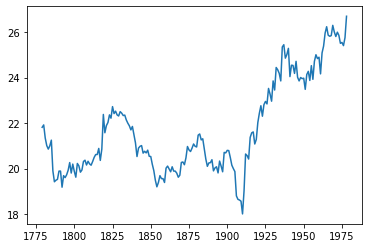

In [70]:
import pandas as pd
df = pd.read_csv("Bandwagon/20230210.0851sh.601601.csv", index_col=0)
df.tail(200).close.plot(x=df.date, y=df.close)
df

Start date,2014-12-19
End date,2023-02-09
Total months,94
,Backtest
Annual return,0.0%
Cumulative returns,0.0%
Annual volatility,50.558%
Sharpe ratio,0.25
Calmar ratio,0.00
Stability,0.00
Max drawdown,-17.493%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.49,2015-07-27,2015-08-27,NaT,NaN
1,16.83,2015-01-15,2015-01-19,2015-01-23,7
2,14.98,2015-01-23,2015-05-28,2015-07-08,119
3,13.55,2015-07-08,2015-07-09,2015-07-27,14
4,12.86,2014-12-26,2015-01-06,2015-01-15,15


Stress Events,mean,min,max
Fall2015,0.04%,-9.61%,7.47%
New Normal,0.05%,-13.55%,17.66%


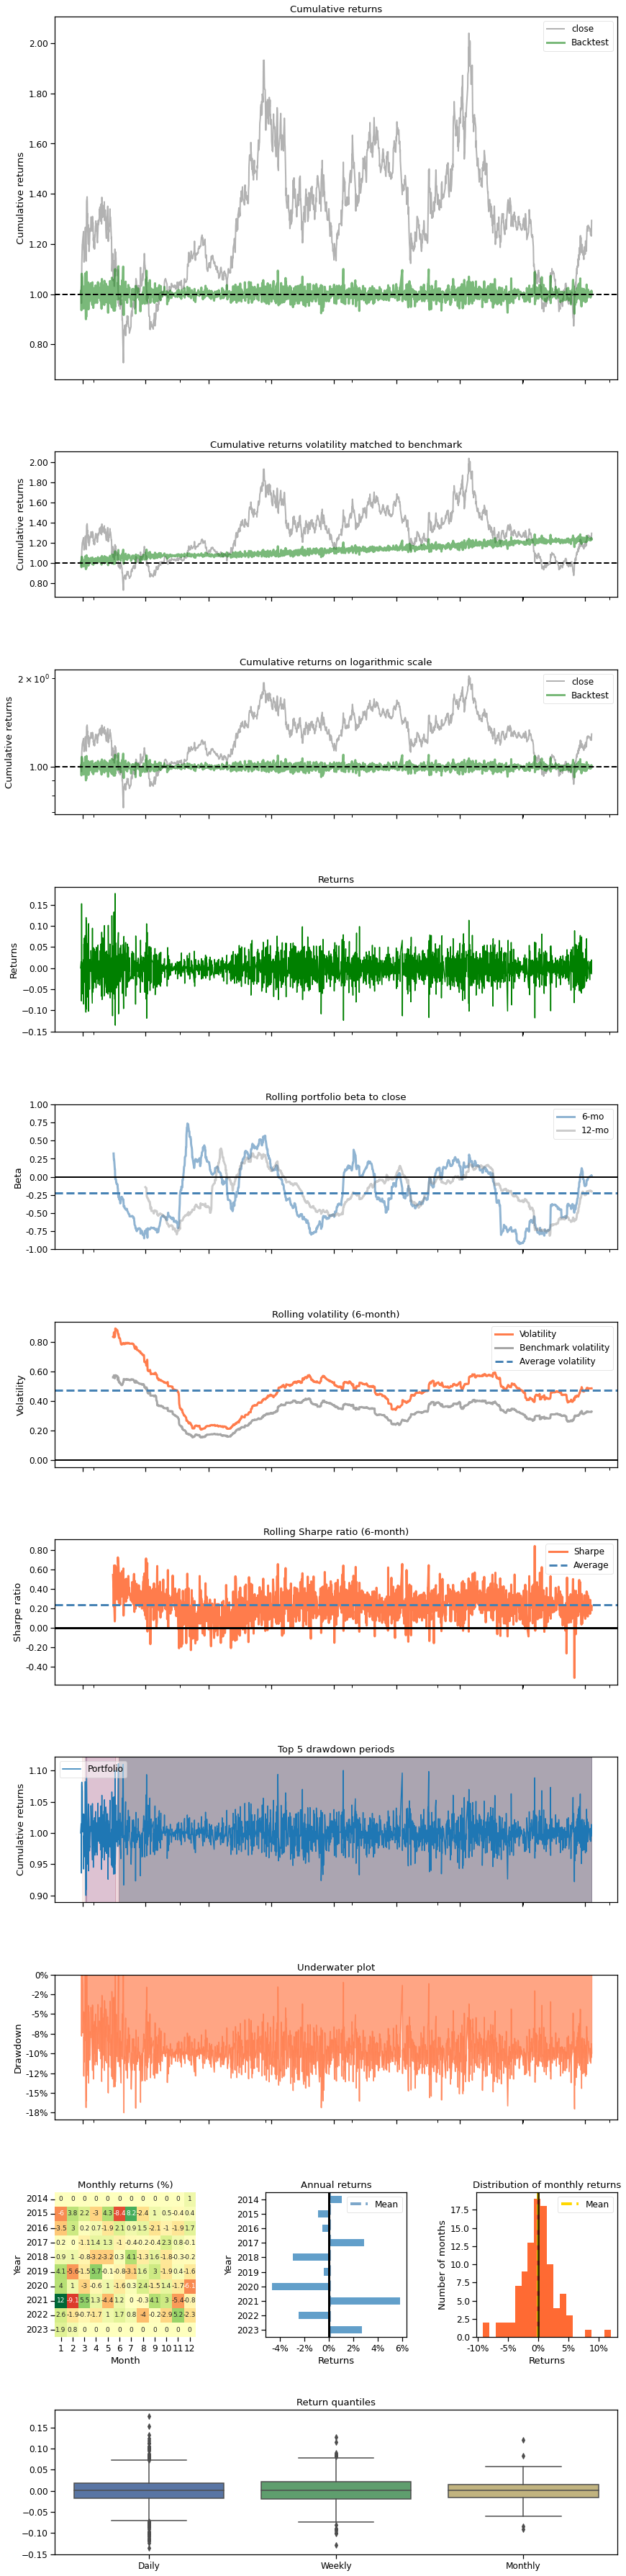

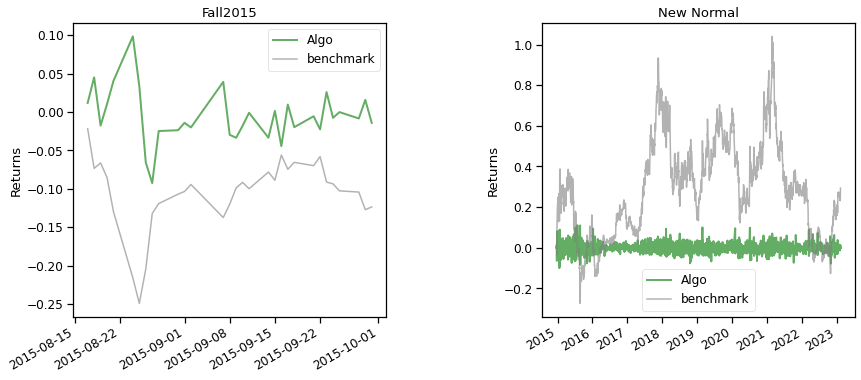

In [73]:
# 然后才能做如下操作
df.index = pd.to_datetime(df.date)
buy_n_hold = df.close.pct_change().fillna(0).tz_localize('UTC')
asset_wo_short = df.change_w_short.diff().fillna(0).tz_localize('UTC')
import pyfolio
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=asset_wo_short  , benchmark_rets=buy_n_hold, set_context=False
        )


In [153]:
def reduce_same(d1):  # action buy和sell的action应该交替出现，所以应该合并连续的sell或连续的buy
            i = 0
            p1 = d1.iloc[i]
            d2 = pd.DataFrame()
            d2 = d2.append(p1)
            while i< len(d1)-1:
                p2 = d1.iloc[i+1]
                if p1.action != p2.action:
                    d2 = d2.append(p2)  # 如果action不同，则收集起来，并将p1移到这个位置
                    p1 = p2
                i += 1  # 如果action相同，则跳过
            
            return d2

actioned = df[df.action.isin([1,-1])]
actioned = reduce_same(actioned)
actioned.index

Int64Index([   0,   20,   22,   29,   39,   46,   53,   89,  101,  106,
            ...
            1882, 1886, 1916, 1920, 1921, 1947, 1956, 1957, 1958, 1977],
           dtype='int64', length=198)

In [184]:
df["real_action"] = df.apply(lambda x: x.action if x.name in actioned.index else 0, axis = 1)
# df[df.date.isin(actioned.date)].action.value_counts()
df.tail(200)

,ticker,date,close,action,reward,change_wo_short,change_w_short,real_action
1779,sh.601601,4/14/2022,21.813066,-1,0.546948,1.000000,0.997808,0
1780,sh.601601,4/15/2022,21.918258,-1,0.401695,1.000000,0.995201,0
1781,sh.601601,4/18/2022,21.344482,-1,0.245485,1.000000,1.026882,0
1782,sh.601601,4/19/2022,21.009779,-1,0.082579,1.000000,1.015931,0
1783,sh.601601,4/20/2022,20.856772,-1,-0.082579,1.000000,1.007336,0
...,...,...,...,...,...,...,...,...
1974,sh.601601,2/3/2023,25.500000,1,0.000000,0.986460,0.986460,0
1975,sh.601601,2/6/2023,25.540000,1,0.000000,1.001569,1.001569,0
1976,sh.601601,2/7/2023,25.400000,1,0.000000,0.994518,0.994518,0
1977,sh.601601,2/8/2023,25.750000,-1,0.000000,1.013780,1.013780,-1
